In [1]:
# Input info
sample_names = "Input,Flt3l"
min_cell = 5

se_cells_meta_f  = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04_no_ChA1/data/variants.prefilterMerge_impute_knnRes.30/aggregate/cells_meta.tsv" #se_cells_meta_labels
#se_cells_meta_f = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/clone_var_init/variants.prefilterMerge_impute_knnRes.30/aggregate/annotation/se_cells_meta_labels.tsv"
outdir = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04_no_ChA1/data/variants.prefilterMerge_impute_knnRes.30/aggregate/cdf"

# se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"
# outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/cdf/" 

filt_donors = ["CHIP_a1_0", "CHIP_a1_1","CHIP_a1_2","CHIP_a1_3","CHIP_a1_4"]

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join, exists
import os
import numpy as np


%matplotlib inline

In [3]:
curr_outdir = join(outdir, f"minC_{min_cell}")
if not exists(curr_outdir):
    os.mkdir(curr_outdir)

In [4]:
sample_names = sample_names.split(",")
sample_names

['Input', 'Flt3l']

In [5]:
se_cells_meta = pd.read_csv(se_cells_meta_f, sep='\t')
se_cells_meta

,cell,lineage,donor,condition,name,ID,run
0,CHIP_b1_Input_AAACTGCAGACTTCCA-1,0,CHIP_b1_0,Input,CHIP_b1_0_0,AAACTGCAGACTTCCA-1_Input,CHIP_b1
1,CHIP_b1_Input_AAACTGCTCCAACGCG-1,0,CHIP_b1_0,Input,CHIP_b1_0_0,AAACTGCTCCAACGCG-1_Input,CHIP_b1
2,CHIP_b1_Input_AAAGGATCAGATAAGT-1,0,CHIP_b1_0,Input,CHIP_b1_0_0,AAAGGATCAGATAAGT-1_Input,CHIP_b1
3,CHIP_b1_Input_AAAGGATTCCTGACCT-1,0,CHIP_b1_0,Input,CHIP_b1_0_0,AAAGGATTCCTGACCT-1_Input,CHIP_b1
4,CHIP_b1_Input_AAAGGGCTCGTTACAG-1,0,CHIP_b1_0,Input,CHIP_b1_0_0,AAAGGGCTCGTTACAG-1_Input,CHIP_b1
...,...,...,...,...,...,...,...
17433,cd34norm_Flt3l_TGTGGCGCACACATGT-1,64,cd34norm_3,Flt3l,cd34norm_3_64,TGTGGCGCACACATGT-1_Flt3l,cd34norm
17434,cd34norm_Flt3l_TTCGTTACACTCCCAT-1,64,cd34norm_3,Flt3l,cd34norm_3_64,TTCGTTACACTCCCAT-1_Flt3l,cd34norm
17435,cd34norm_Flt3l_CTCCCAAAGAGCAGCT-1,65,cd34norm_3,Flt3l,cd34norm_3_65,CTCCCAAAGAGCAGCT-1_Flt3l,cd34norm
17436,cd34norm_Flt3l_GTGCACGAGGATTGAT-1,65,cd34norm_3,Flt3l,cd34norm_3_65,GTGCACGAGGATTGAT-1_Flt3l,cd34norm


In [6]:
group_counts = se_cells_meta.groupby(["condition", "donor"]).size()
group_counts

condition  donor     
Flt3l      CHIP_b1_0      260
           CHIP_b1_1      113
           cd34norm_0    2134
           cd34norm_1    2053
           cd34norm_2    1385
           cd34norm_3    1852
Input      CHIP_b1_0     3606
           CHIP_b1_1     2630
           CHIP_b2_0     1338
           CHIP_b2_1     2067
dtype: int64

### Remove None before normalizing

In [7]:
def plots(df, name, scatter_hue_col=None):
    f, ax =plt.subplots(figsize=(12,12))
    if df.shape[0] > 0:
        df[["ncells"]].plot.bar(ax=ax)
    else:
        f = plt.figure()
        plt.savefig(join(curr_outdir, name+".barplot_conditions.svg"))
        plt.savefig(join(curr_outdir, name+".barplot_conditions.png"))
        plt.savefig(join(curr_outdir, name+".barplot.svg"))
        plt.savefig(join(curr_outdir, name+".conditionScatter.svg"))
        plt.savefig(join(curr_outdir, name+".conditionScatter.png"))
        return
    
    plt.savefig(join(curr_outdir, name+".barplot.png"))
    plt.savefig(join(curr_outdir, name+".barplot.svg"))
    
    f, ax =plt.subplots(figsize=(12,12))
    df.drop(["ncells", "donor"],axis=1).plot.bar(stacked=True, ax=ax)
    plt.savefig(join(curr_outdir, name+".barplot_conditions.png"))
    plt.savefig(join(curr_outdir, name+".barplot_conditions.svg"))
    
    
    cultured_inds = set(df.columns.values) - {"Input", "ncells","donor"}
    df["cultured"] = df[cultured_inds].sum(axis=1)
    
    # Save this figure even if empty
    f, ax = plt.subplots(figsize=(12,12))
    if "Input" in df.columns and len(sample_names)>1:
        sns.scatterplot(data=df, x="Input", y="cultured", hue=scatter_hue_col, s=24, ax=ax)
        ax.set_box_aspect(1)
    plt.savefig(join(curr_outdir, name+".conditionScatter.png"))
    plt.savefig(join(curr_outdir, name+".conditionScatter.svg"))

    # Only save this figure if data there
    if len(sample_names) > 1:
        if sample_names[0] in df.columns and sample_names[1] in df.columns:
            f, ax =plt.subplots(figsize=(12,12))
            sns.scatterplot(data=df, x=sample_names[0], y=sample_names[1], hue=scatter_hue_col, s=24, ax=ax)
            ax.set_box_aspect(1)
            plt.savefig(join(curr_outdir, name+".conditionScatter_comp02.png"))
            plt.savefig(join(curr_outdir, name+".conditionScatter_comp02.svg"))    

    return

In [8]:
clone_counts = se_cells_meta.groupby(["name", "condition","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_counts = clone_counts[~(clone_counts["name"]=="None")]
clone_counts_combined = clone_counts.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_counts[clone_counts["name"]==x.name]
    return curr.set_index("condition")["ncells"]

clone_counts_df = pd.concat((clone_counts_combined, clone_counts_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_counts_df

clone_counts_filt_10_df = clone_counts_df.loc[clone_counts_df["ncells"]>=min_cell]
# if clone_counts_filt_10_df.shape[0] == 0:
#     clone_counts_filt_10_df = clone_counts_df.loc[clone_counts_df["ncells"]>=2]

## CDF 

,donor,total,n_50,prop_50,frac_50,n_90,prop_90,frac_90,max,mean +/- std,median
7,cd34norm_3,50,9,0.180000,0.528564,27,0.540000,0.900721,183.0,36.06 +/- 40.17,23.0
6,cd34norm_2,41,6,0.146341,0.513812,21,0.512195,0.902920,215.0,30.90 +/- 40.87,10.0
0,CHIP_b1_0,36,9,0.250000,0.504656,28,0.777778,0.913606,447.0,107.39 +/- 83.32,79.5
5,cd34norm_1,35,7,0.200000,0.503248,22,0.628571,0.905047,197.0,57.17 +/- 53.17,41.0
2,CHIP_b2_0,34,10,0.294118,0.503030,23,0.676471,0.916667,91.0,38.82 +/- 24.42,41.0
4,cd34norm_0,33,5,0.151515,0.500237,16,0.484848,0.906294,268.0,64.03 +/- 75.88,26.0
3,CHIP_b2_1,27,9,0.333333,0.514756,23,0.851852,0.912917,249.0,76.56 +/- 49.08,62.0
1,CHIP_b1_1,26,7,0.269231,0.500182,18,0.692308,0.917973,327.0,105.50 +/- 73.75,103.0


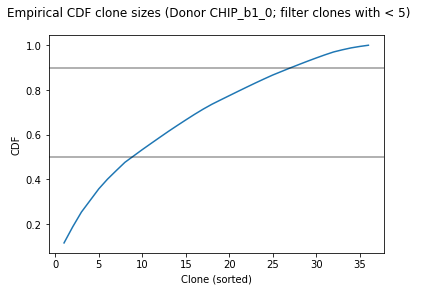

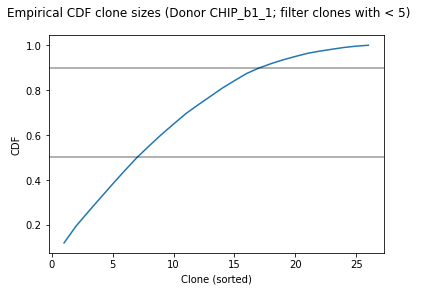

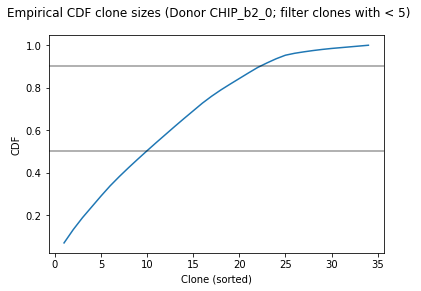

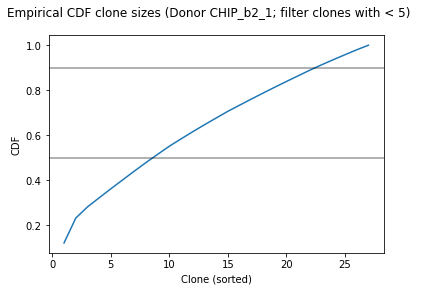

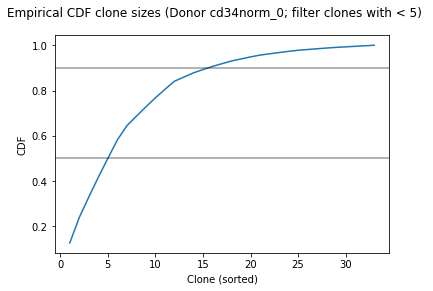

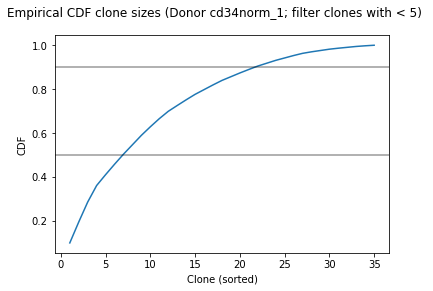

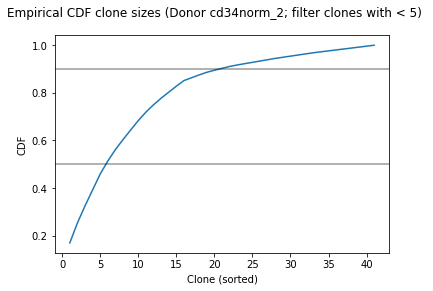

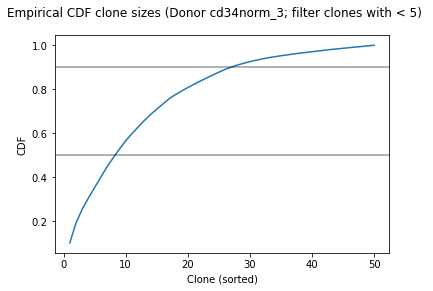

In [9]:
stats = pd.DataFrame(columns=["donor", "total", "n_50", "prop_50", "frac_50", "n_90", "prop_90", "frac_90"])
dons = []
for  ind, val in clone_counts_filt_10_df.groupby("donor"):
    # a is the data array
    f, ax = plt.subplots(nrows=1)
    dons.append(ind)
    x = val.sort_values("ncells", ascending=False)["ncells"]
    
    mean_std = f"{x.mean():.2f} +/- {x.std():.2f}"
    
    #x = np.sort(a)
    ecdf = (x/x.sum()).cumsum()
    total = len(val)
    n_50 = (ecdf<0.5).sum()+1
    prop_50 = n_50/total
    frac_50 = ecdf.iloc[n_50-1]
    n_90 = (ecdf<0.9).sum()+1
    prop_90 = n_90/total
    frac_90 = ecdf.iloc[n_90-1]
    
    stats = stats.append(pd.Series({"total":total, "donor": ind, "mean +/- std": mean_std,
                                    "median":x.median(), "max": x.max(), 
                                    "n_50":n_50, "prop_50": prop_50, "frac_50":frac_50, 
                                    "n_90":n_90, "prop_90": prop_90, "frac_90":frac_90}), 
             ignore_index=True)
    y = np.arange(len(x))/float(len(x))
    plt.plot(np.arange(1,1+len(ecdf)), ecdf)
    plt.axhline(0.5, color='black', alpha=0.4)
    plt.axhline(0.9, color='black', alpha=0.4)
    plt.xlabel("Clone (sorted)")
    plt.ylabel("CDF")
    plt.suptitle(f"Empirical CDF clone sizes (Donor {ind}; filter clones with < {min_cell}) ")
    plt.savefig(join(curr_outdir, f"ecdf.donor{ind}.pdf"))

#stats = stats.sort_values("donor")
stats = stats.sort_values("total", ascending=False)
stats.to_csv(join(curr_outdir, "ecdf.csv"), index=False)
stats    

## Same group

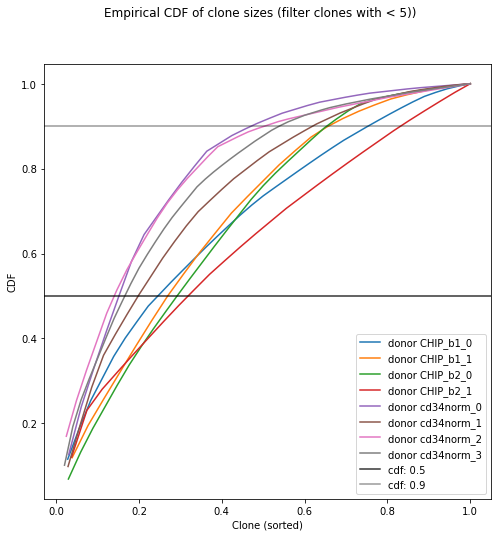

In [10]:
f, ax = plt.subplots(nrows=1, figsize=(8,8))
for ind, val in clone_counts_filt_10_df.groupby("donor"):
    #f, ax = plt.subplots(nrows=1)

    dons.append(ind)
    x = val.sort_values("ncells", ascending=False)["ncells"]
    ecdf = (x/x.sum()).cumsum()
    #y = np.arange(len(x))/float(len(x))
    ax.plot(np.arange(1, len(ecdf)+1)/(len(ecdf)), ecdf.values, label=f"donor {ind}")

plt.xlabel("Clone (sorted)")
plt.ylabel("CDF")
plt.suptitle(f"Empirical CDF of clone sizes (filter clones with < {min_cell}))")
plt.axhline(0.5, color='black', alpha=0.8, label="cdf: 0.5")
plt.axhline(0.9, color='black', alpha=0.4, label="cdf: 0.9")
plt.legend(loc="best")
plt.savefig(join(curr_outdir, f"ecdf.pdf"))

    

In [11]:
### Remove CHIP-a1
if clone_counts_filt_10_df["donor"].isin(filt_donors).any():
    f, ax = plt.subplots(nrows=1, figsize=(8,8))
    filt_clone_counts_filt_10_df = clone_counts_filt_10_df[~(clone_counts_filt_10_df["donor"].isin(filt_donors))]

    for ind, val in filt_clone_counts_filt_10_df.groupby("donor"):
        #f, ax = plt.subplots(nrows=1)

        dons.append(ind)
        x = val.sort_values("ncells", ascending=False)["ncells"]
        ecdf = (x/x.sum()).cumsum()
        #y = np.arange(len(x))/float(len(x))
        ax.plot(np.arange(1, len(ecdf)+1)/(len(ecdf)), ecdf.values, label=f"donor {ind}")

    plt.xlabel("Clone (sorted)")
    plt.ylabel("CDF")
    plt.suptitle(f"Empirical CDF of clone sizes (filter clones with < {min_cell}))")
    plt.axhline(0.5, color='black', alpha=0.8, label="cdf: 0.5")
    plt.axhline(0.9, color='black', alpha=0.4, label="cdf: 0.9")
    plt.legend(loc="best")
    plt.savefig(join(curr_outdir, f"ecdf.filtdonors.pdf"))

    

----

In [12]:
# # Normalize

# clone_norm = clone_counts.copy()
# clone_norm["ncells"] = clone_norm.apply(lambda x: x["ncells"]/group_counts.loc[(x["condition"], x["donor"])] , axis=1)

# print("sum of normed values", clone_norm.groupby(["condition", "donor"]).sum()["ncells"])

# #clone_norm = se_cells_meta.groupby(["name", "condition","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
# clone_norm = clone_norm[~(clone_norm["name"]=="None")]
# clone_norm_combined = clone_norm.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
# def get_clone_count(x):
#     curr = clone_norm[clone_norm["name"]==x.name]
#     return curr.set_index("condition")["ncells"]

# clone_norm_df = pd.concat((clone_norm_combined, clone_norm_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
# clone_norm_df


